# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [1]:
m=5
run = 1

1

Choose your grid

In [2]:
global compactified=true
global loggrid=false
global bisection=false
global zeroformat=false
global twod=false

global source=false

false

In [3]:
function compactify(r)
    x=r/(1+r)
    return x
end

compactify (generic function with 1 method)

In [4]:
using Quadmath, Printf

res=m;
N=2.0^m*100.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=2.0
end

dx=Xf/N
if loggrid==false
    dt=0.5*round(dx,digits=10)
else
    dt=0.1*round(dx,digits=10)
end
Nt=N
Tf=Nt*dt;

In [5]:
print(N)

1600.0

In [6]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

# Grid

In [7]:
using Printf
include("./TMYangMillsTHREE.jl");

In [8]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
end;

step size is  0.000625
the time step is 0.0003125


# Initial data of m β Ψ and Ψ,x

In [9]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initxi=zeros(L)
initderxi=zeros(L)

state_array=[initm initbeta initxi initderxi];

#WBAR,R
#0.088125<A*<0.08875
A=0.01#0.08865958683658391#0.0884375
r0=0.3
sigma=0.08

initderxi[4:L-3] = init_derpsi(initX1,r0,sigma,A)

state_array[:,4] = initderxi
state_array=ghost(state_array)

####
#XI FROM XI,X

derxi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

funcs=[derxi_func];

In [10]:
(0.088125+0.08875)/2
there were runs with 0.6 as critical stop that were marked as critical but didnt crash

LoadError: syntax: extra token "were" after end of expression

In [11]:
y0=[0.0 0.0 0.0]

if twod==true
        state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
    else
        state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
end

#state_array = ghost(state_array);

1601×3 Matrix{Float64}:
 0.0          0.0           0.0
 1.31838e-18  1.30992e-15   5.1799e-12
 3.14226e-18  2.05294e-15   1.0991e-11
 5.2789e-18   2.59789e-15   1.74902e-11
 7.78251e-18  3.07896e-15   2.47387e-11
 1.07164e-17  3.54046e-15   3.28027e-11
 1.41545e-17  4.00448e-15   4.17534e-11
 1.8183e-17   4.48513e-15   5.16675e-11
 2.29025e-17  4.99322e-15   6.26276e-11
 2.84302e-17  5.53812e-15   7.47227e-11
 3.49023e-17  6.12881e-15   8.80486e-11
 4.24776e-17  6.77434e-15   1.02708e-10
 5.13405e-17  7.48426e-15   1.18812e-10
 ⋮                         
 0.00210727   0.006334     -3.06334e-18
 0.00210727   0.006334     -3.06334e-18
 0.00210727   0.006334     -3.06334e-18
 0.00210727   0.006334     -3.06334e-18
 0.00210727   0.006334     -3.06334e-18
 0.00210727   0.006334     -3.06334e-18
 0.00210727   0.006334     -3.06334e-18
 0.00210727   0.006334     -3.06334e-18
 0.00210727   0.006334     -3.06334e-18
 0.00210727   0.006334     -3.06334e-18
 0.00210727   0.006334     -3.06334e-1

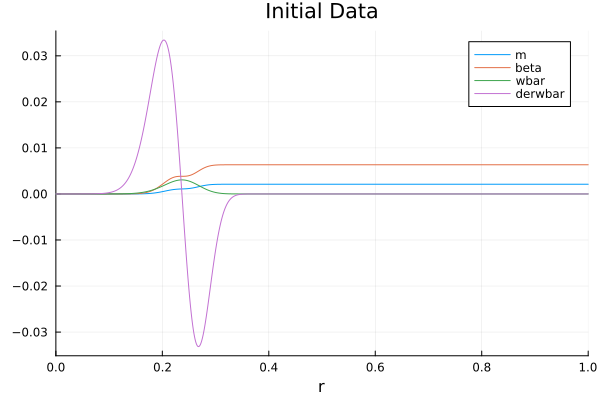

In [12]:
using Plots #showing initial data and the initial status of the horizon finder
plot((initX[4:L-3]), state_array[4:L-3,1:4], xaxis="r",title="Initial Data", labels=["m" "beta" "wbar" "derwbar"],xlim=[0,1])

In [13]:
function compactify(r)
    return r/(1+r)
end
function uncompactify(x)
    return x/(1-x)
end;

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [14]:
using CSV, Tables
#CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "xi", "derxi", "derderxi"]

derderxi=Der_arrayLOP(state_array,4,initX) .* (initX .- 1) .^ 2
print_muninn(files, 0, [state_array[:,1:4] derderxi],res,"w", initX)

In [15]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [16]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

0.400500469140931


In [17]:
using Base.Threads
Threads.nthreads()

4

In [18]:
monitor_ratio[5:L-4] = 2 .* state_array[5:L-4,1] ./ initX[5:L-4] .* (1 .- initX[5:L-4]);
maximum(monitor_ratio)

0.009852836027097725

In [19]:
dt=0.002/2^(m-1)

0.000125

 ## Time evolution

fixed grid

In [20]:
finaltime=1.25
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 10 dt is 0.000125, t=0.0012500000000000002 speed is 0.4993751953125, dx/dt=5.0


iteration 20 dt is 0.000125, t=0.0025000000000000014 speed is 0.4993751953125001, dx/dt=5.0


iteration 30 dt is 0.000125, t=0.0037500000000000025 speed is 0.4993751953124999, dx/dt=5.0


iteration 40 dt is 0.000125, t=0.005000000000000004 speed is 0.4993751953125, dx/dt=5.0


iteration 50 dt is 0.000125, t=0.006250000000000005 speed is 0.4993751953125, dx/dt=5.0


iteration 60 dt is 0.000125, t=0.007500000000000006 speed is 0.4993751953125, dx/dt=5.0


iteration 70 dt is 0.000125, t=0.008750000000000006 speed is 0.4993751953125, dx/dt=5.0


iteration 80 dt is 0.000125, t=0.010000000000000007 speed is 0.4993751953125, dx/dt=5.0


iteration 90 dt is 0.000125, t=0.011250000000000008 speed is 0.4993751953125, dx/dt=5.0


iteration 100 dt is 0.000125, t=0.01250000000000001 speed is 0.4993751953125, dx/dt=5.0


iteration 110 dt is 0.000125, t=0.01375000000000001 speed is 0.4993751953125, dx/dt=5.0





iteration 900 dt is 0.000125, t=0.11250000000000009 speed is 0.4993751953124831, dx/dt=5.0


iteration 910 dt is 0.000125, t=0.11375000000000009 speed is 0.49937519531248137, dx/dt=5.0


iteration 920 dt is 0.000125, t=0.11500000000000009 speed is 0.4993751953124795, dx/dt=5.0


iteration 930 dt is 0.000125, t=0.11625000000000009 speed is 0.49937519531247737, dx/dt=5.0


iteration 940 dt is 0.000125, t=0.11750000000000009 speed is 0.4993751953124751, dx/dt=5.0


iteration 950 dt is 0.000125, t=0.11875000000000009 speed is 0.49937519531247254, dx/dt=5.0


iteration 960 dt is 0.000125, t=0.12000000000000009 speed is 0.49937519531246993, dx/dt=5.0


iteration 970 dt is 0.000125, t=0.1212500000000001 speed is 0.49937519531246677, dx/dt=5.0


iteration 980 dt is 0.000125, t=0.1225000000000001 speed is 0.4993751953124636, dx/dt=5.0


iteration 990 dt is 0.000125, t=0.1237500000000001 speed is 0.49937519531245994, dx/dt=5.0


iteration 1000 dt is 0.000125, t=0.12500000000000008 speed is 0.4



iteration 1780 dt is 0.000125, t=0.22249999999998935 speed is 0.4993751952876193, dx/dt=5.0


iteration 1790 dt is 0.000125, t=0.2237499999999892 speed is 0.49937519528585156, dx/dt=5.0


iteration 1800 dt is 0.000125, t=0.22499999999998907 speed is 0.49937519528396696, dx/dt=5.0


iteration 1810 dt is 0.000125, t=0.22624999999998893 speed is 0.49937519528195906, dx/dt=5.0


iteration 1820 dt is 0.000125, t=0.2274999999999888 speed is 0.49937519527982027, dx/dt=5.0


iteration 1830 dt is 0.000125, t=0.22874999999998866 speed is 0.4993751952775429, dx/dt=5.0


iteration 1840 dt is 0.000125, t=0.22999999999998852 speed is 0.4993751952751187, dx/dt=5.0


iteration 1850 dt is 0.000125, t=0.23124999999998838 speed is 0.4993751952725392, dx/dt=5.0


iteration 1860 dt is 0.000125, t=0.23249999999998824 speed is 0.49937519526979546, dx/dt=5.0


iteration 1870 dt is 0.000125, t=0.2337499999999881 speed is 0.49937519526687785, dx/dt=5.0


iteration 1880 dt is 0.000125, t=0.23499999999998797 sp



iteration 2660 dt is 0.000125, t=0.33249999999997726 speed is 0.4993751923203002, dx/dt=5.0


iteration 2670 dt is 0.000125, t=0.3337499999999771 speed is 0.499375192200389, dx/dt=5.0


iteration 2680 dt is 0.000125, t=0.334999999999977 speed is 0.49937519207684217, dx/dt=5.0


iteration 2690 dt is 0.000125, t=0.33624999999997685 speed is 0.49937519194961016, dx/dt=5.0


iteration 2700 dt is 0.000125, t=0.3374999999999767 speed is 0.49937519181864576, dx/dt=5.0


iteration 2710 dt is 0.000125, t=0.33874999999997657 speed is 0.49937519168390504, dx/dt=5.0


iteration 2720 dt is 0.000125, t=0.33999999999997643 speed is 0.49937519154534643, dx/dt=5.0


iteration 2730 dt is 0.000125, t=0.3412499999999763 speed is 0.49937519140293246, dx/dt=5.0


iteration 2740 dt is 0.000125, t=0.34249999999997616 speed is 0.49937519125662855, dx/dt=5.0


iteration 2750 dt is 0.000125, t=0.343749999999976 speed is 0.4993751911064039, dx/dt=5.0


iteration 2760 dt is 0.000125, t=0.3449999999999759 speed i



iteration 3540 dt is 0.000125, t=0.44249999999996514 speed is 0.49937517602468334, dx/dt=5.0


iteration 3550 dt is 0.000125, t=0.443749999999965 speed is 0.4993751760619545, dx/dt=5.0


iteration 3560 dt is 0.000125, t=0.44499999999996487 speed is 0.49937517611294424, dx/dt=5.0


iteration 3570 dt is 0.000125, t=0.44624999999996473 speed is 0.49937517617779187, dx/dt=5.0


iteration 3580 dt is 0.000125, t=0.4474999999999646 speed is 0.49937517625661476, dx/dt=5.0


iteration 3590 dt is 0.000125, t=0.44874999999996446 speed is 0.49937517634950745, dx/dt=5.0


iteration 3600 dt is 0.000125, t=0.4499999999999643 speed is 0.4993751764565411, dx/dt=5.0


iteration 3610 dt is 0.000125, t=0.4512499999999642 speed is 0.4993751765777623, dx/dt=5.0


iteration 3620 dt is 0.000125, t=0.45249999999996404 speed is 0.4993751767131921, dx/dt=5.0


iteration 3630 dt is 0.000125, t=0.4537499999999639 speed is 0.499375176862826, dx/dt=5.0


iteration 3640 dt is 0.000125, t=0.45499999999996377 speed i



iteration 4420 dt is 0.000125, t=0.5524999999999763 speed is 0.49937519055912916, dx/dt=5.0


iteration 4430 dt is 0.000125, t=0.5537499999999768 speed is 0.4993751900319137, dx/dt=5.0


iteration 4440 dt is 0.000125, t=0.5549999999999772 speed is 0.4993751894787476, dx/dt=5.0


iteration 4450 dt is 0.000125, t=0.5562499999999776 speed is 0.4993751889001874, dx/dt=5.0


iteration 4460 dt is 0.000125, t=0.557499999999978 speed is 0.4993751882968438, dx/dt=5.0


iteration 4470 dt is 0.000125, t=0.5587499999999784 speed is 0.49937518766938116, dx/dt=5.0


iteration 4480 dt is 0.000125, t=0.5599999999999788 speed is 0.49937518701851663, dx/dt=5.0


iteration 4490 dt is 0.000125, t=0.5612499999999793 speed is 0.49937518634501915, dx/dt=5.0


iteration 4500 dt is 0.000125, t=0.5624999999999797 speed is 0.49937518564970834, dx/dt=5.0


iteration 4510 dt is 0.000125, t=0.5637499999999801 speed is 0.49937518493345345, dx/dt=5.0


iteration 4520 dt is 0.000125, t=0.5649999999999805 speed is 0.



iteration 5300 dt is 0.000125, t=0.6625000000000131 speed is 0.49937515846197, dx/dt=5.0


iteration 5310 dt is 0.000125, t=0.6637500000000135 speed is 0.4993751591798288, dx/dt=5.0


iteration 5320 dt is 0.000125, t=0.6650000000000139 speed is 0.4993751599147001, dx/dt=5.0


iteration 5330 dt is 0.000125, t=0.6662500000000143 speed is 0.49937516066533044, dx/dt=5.0


iteration 5340 dt is 0.000125, t=0.6675000000000147 speed is 0.499375161430451, dx/dt=5.0


iteration 5350 dt is 0.000125, t=0.6687500000000152 speed is 0.49937516220878136, dx/dt=5.0


iteration 5360 dt is 0.000125, t=0.6700000000000156 speed is 0.4993751629990323, dx/dt=5.0


iteration 5370 dt is 0.000125, t=0.671250000000016 speed is 0.4993751637999083, dx/dt=5.0


iteration 5380 dt is 0.000125, t=0.6725000000000164 speed is 0.49937516461011155, dx/dt=5.0


iteration 5390 dt is 0.000125, t=0.6737500000000168 speed is 0.49937516542834237, dx/dt=5.0


iteration 5400 dt is 0.000125, t=0.6750000000000173 speed is 0.49937



iteration 6180 dt is 0.000125, t=0.7725000000000498 speed is 0.4993751935289308, dx/dt=5.0


iteration 6190 dt is 0.000125, t=0.7737500000000502 speed is 0.4993751933861049, dx/dt=5.0


iteration 6200 dt is 0.000125, t=0.7750000000000506 speed is 0.4993751932420305, dx/dt=5.0


iteration 6210 dt is 0.000125, t=0.7762500000000511 speed is 0.4993751930971641, dx/dt=5.0


iteration 6220 dt is 0.000125, t=0.7775000000000515 speed is 0.4993751929519466, dx/dt=5.0


iteration 6230 dt is 0.000125, t=0.7787500000000519 speed is 0.499375192806803, dx/dt=5.0


iteration 6240 dt is 0.000125, t=0.7800000000000523 speed is 0.49937519266214186, dx/dt=5.0


iteration 6250 dt is 0.000125, t=0.7812500000000527 speed is 0.4993751925183552, dx/dt=5.0


iteration 6260 dt is 0.000125, t=0.7825000000000532 speed is 0.499375192375818, dx/dt=5.0


iteration 6270 dt is 0.000125, t=0.7837500000000536 speed is 0.4993751922348881, dx/dt=5.0


iteration 6280 dt is 0.000125, t=0.785000000000054 speed is 0.4993751



iteration 7060 dt is 0.000125, t=0.8825000000000865 speed is 0.49937519267313835, dx/dt=5.0


iteration 7070 dt is 0.000125, t=0.883750000000087 speed is 0.4993751927466377, dx/dt=5.0


iteration 7080 dt is 0.000125, t=0.8850000000000874 speed is 0.49937519281920817, dx/dt=5.0


iteration 7090 dt is 0.000125, t=0.8862500000000878 speed is 0.49937519289080373, dx/dt=5.0


iteration 7100 dt is 0.000125, t=0.8875000000000882 speed is 0.49937519296138244, dx/dt=5.0


iteration 7110 dt is 0.000125, t=0.8887500000000886 speed is 0.49937519303090566, dx/dt=5.0


iteration 7120 dt is 0.000125, t=0.890000000000089 speed is 0.4993751930993377, dx/dt=5.0


iteration 7130 dt is 0.000125, t=0.8912500000000895 speed is 0.4993751931666468, dx/dt=5.0


iteration 7140 dt is 0.000125, t=0.8925000000000899 speed is 0.49937519323280355, dx/dt=5.0


iteration 7150 dt is 0.000125, t=0.8937500000000903 speed is 0.499375193297782, dx/dt=5.0


iteration 7160 dt is 0.000125, t=0.8950000000000907 speed is 0.49



iteration 7940 dt is 0.000125, t=0.9925000000001233 speed is 0.4993751952631572, dx/dt=5.0


iteration 7950 dt is 0.000125, t=0.9937500000001237 speed is 0.4993751952660796, dx/dt=5.0


iteration 7960 dt is 0.000125, t=0.9950000000001241 speed is 0.4993751952688437, dx/dt=5.0


iteration 7970 dt is 0.000125, t=0.9962500000001245 speed is 0.4993751952714573, dx/dt=5.0


iteration 7980 dt is 0.000125, t=0.997500000000125 speed is 0.49937519527392765, dx/dt=5.0


iteration 7990 dt is 0.000125, t=0.9987500000001254 speed is 0.49937519527626156, dx/dt=5.0


iteration 8000 dt is 0.000125, t=1.0000000000001257 speed is 0.49937519527846597, dx/dt=5.0


iteration 8010 dt is 0.000125, t=1.001250000000125 speed is 0.4993751952805472, dx/dt=5.0


iteration 8020 dt is 0.000125, t=1.0025000000001243 speed is 0.4993751952825114, dx/dt=5.0


iteration 8030 dt is 0.000125, t=1.0037500000001236 speed is 0.4993751952843647, dx/dt=5.0


iteration 8040 dt is 0.000125, t=1.005000000000123 speed is 0.49937



iteration 8820 dt is 0.000125, t=1.1025000000000689 speed is 0.49937519531245145, dx/dt=5.0


iteration 8830 dt is 0.000125, t=1.1037500000000682 speed is 0.4993751953124563, dx/dt=5.0


iteration 8840 dt is 0.000125, t=1.1050000000000675 speed is 0.49937519531246083, dx/dt=5.0


iteration 8850 dt is 0.000125, t=1.1062500000000668 speed is 0.4993751953124649, dx/dt=5.0


iteration 8860 dt is 0.000125, t=1.107500000000066 speed is 0.4993751953124686, dx/dt=5.0


iteration 8870 dt is 0.000125, t=1.1087500000000654 speed is 0.49937519531247193, dx/dt=5.0


iteration 8880 dt is 0.000125, t=1.1100000000000647 speed is 0.49937519531247493, dx/dt=5.0


iteration 8890 dt is 0.000125, t=1.111250000000064 speed is 0.4993751953124777, dx/dt=5.0


iteration 8900 dt is 0.000125, t=1.1125000000000633 speed is 0.49937519531248004, dx/dt=5.0


iteration 8910 dt is 0.000125, t=1.1137500000000626 speed is 0.4993751953124824, dx/dt=5.0


iteration 8920 dt is 0.000125, t=1.115000000000062 speed is 0.499



iteration 9710 dt is 0.000125, t=1.2137500000000072 speed is 0.4993751953124993, dx/dt=5.0


iteration 9720 dt is 0.000125, t=1.2150000000000065 speed is 0.4993751953124993, dx/dt=5.0


iteration 9730 dt is 0.000125, t=1.2162500000000058 speed is 0.4993751953124993, dx/dt=5.0


iteration 9740 dt is 0.000125, t=1.2175000000000051 speed is 0.4993751953124993, dx/dt=5.0


iteration 9750 dt is 0.000125, t=1.2187500000000044 speed is 0.4993751953124993, dx/dt=5.0


iteration 9760 dt is 0.000125, t=1.2200000000000037 speed is 0.4993751953124994, dx/dt=5.0


iteration 9770 dt is 0.000125, t=1.221250000000003 speed is 0.4993751953124993, dx/dt=5.0


iteration 9780 dt is 0.000125, t=1.2225000000000024 speed is 0.4993751953124993, dx/dt=5.0


iteration 9790 dt is 0.000125, t=1.2237500000000017 speed is 0.4993751953124994, dx/dt=5.0


iteration 9800 dt is 0.000125, t=1.225000000000001 speed is 0.4993751953124994, dx/dt=5.0


iteration 9810 dt is 0.000125, t=1.2262500000000003 speed is 0.4993751